In [1]:
from torch.utils.data import Dataset
import os 
import torch 
import numpy as np 
import pydicom
import glob
import cv2
import matplotlib.pyplot as plt


Matplotlib created a temporary config/cache directory at /tmp/matplotlib-8xbhefzl because the default path (/home/ubuntu/.config/matplotlib) is not a writable directory; it is highly recommended to set the MPLCONFIGDIR environment variable to a writable directory, in particular to speed up the import of Matplotlib and to better support multiprocessing.
In /home/ubuntu/tensorflow/anaconda3/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The text.latex.preview rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In /home/ubuntu/tensorflow/anaconda3/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The mathtext.fallback_to_cm rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In /home/ubuntu/tensorflow/anaconda3/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: Support for setting the 'mathtext.fallback_to_cm' rcParam is dep

In [42]:
path = "/home/ubuntu/Andrew/lung_datatset/PE/0317204032.dcm"

2373 0


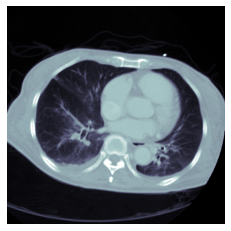

In [43]:
img =  pydicom.dcmread(path).pixel_array.astype(np.int16)
print(img.max(), img.min())
img[img>1624] = 1624
plt.imshow(img ,plt.cm.bone)
plt.axis('off')
plt.show()

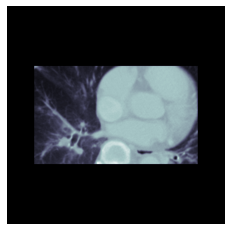

In [44]:
img = crop_center(img, 180,300)
img = cv2.copyMakeBorder(img,110,110,50,50,cv2.BORDER_CONSTANT,value=0)
plt.imshow(img ,plt.cm.bone)
plt.axis('off')
plt.show()

2004 0
350 0


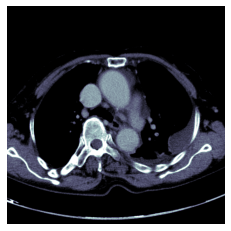

In [4]:
#L40W400 defult
img =  pydicom.dcmread(path).pixel_array.astype(np.int16)
print(img.max(), img.min())
img = img - 950
img[img>350] = 350
img[img<0] = 0
print(img.max(), img.min())
plt.imshow(img,plt.cm.bone)
plt.axis('off')
plt.show()

2004 0


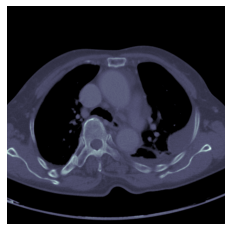

In [5]:
#L-400W1500 lung
img =  pydicom.dcmread(path).pixel_array.astype(np.int16)
print(img.max(), img.min())
img = img - 600
img[img>1900] = 1900
img[img<0]=0
img = (img/950)-1
plt.imshow(img,plt.cm.bone)
plt.axis('off')
plt.show()

2004 0
350 -500


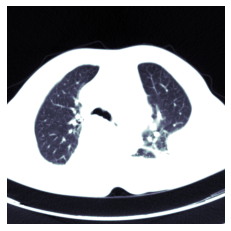

In [42]:
img =  pydicom.dcmread(path).pixel_array.astype(np.int16)
print(img.max(), img.min())
img = img - 500
img[img>350] = 350
print(img.max(), img.min())
plt.imshow(img ,plt.cm.bone)
plt.axis('off')
plt.show()

In [8]:
def edgecut(image):
    
    #近似二值化dicom影像
    image [image >800] = 800
    image [image <700] = 700
    image  = image -700
    image  = (image /50)-1
    
    plt.imshow(image ,plt.cm.bone)
    plt.axis('off')
    plt.show()
    
    #尋找上下左右邊界
    i = 0
    j = 0
    left_edge = []
    top_edge = []
    right_edge = []
    bottom_edge = []
    
    for j in range(400):
        #print('y = ',j)
        flag = 0
        for i in range(400):

            if image[j,i]>0.9:
                flag = 1
                #print(j)

            if (image[j, i] < -0.9) and (flag == 1) :
                #print(i,j)
                left_edge.append(i)
                #y.append(1)
                break

    for j in range(400):
        #print('y = ',j)
        flag = 0
        for i in range(400):

            if image[j,399-i]>0.9:
                flag = 1
                #print(j)

            if (image[j, 399-i] < -0.9) and (flag == 1) :
                #print(i,j)
                right_edge.append(i)
                #y.append(1)
                break

    for j in range(400):
        #print('y = ',j)
        flag = 0
        for i in range(400):

            if image[i,j]>0.9:
                flag = 1
                #print(j)

            if (image[i, j] < -0.9) and (flag == 1) :
                #print(i,j)
                top_edge.append(i)
                #y.append(1)
                break

    for j in range(400):
        #print('y = ',j)
        flag = 0
        for i in range(400):

            if image[i,j]>0.9:
                flag = 1
                #print(j)

            if (image[i, j] < -0.9) and (flag == 1) :
                #print(i,j)
                top_edge.append(i)
                #y.append(1)
                break
    
    for j  in range(400):
        #print('y = ',j)
        flag = 0
        for i in range(400):

            if image[399-i,j]>0.9:
                flag =  1
                #print(j)

            if (image[399-i, j] < -0.9) and (flag == 1) :
                #print(i,j)
                bottom_edge.append(i)
                #y.append(1)
                break
    right_line = np.min(right_edge)         
    left_line = np.min(left_edge)
    top_line = np.min(top_edge)
    bottom_line = np.min(bottom_edge)
   
    

    return top_line, bottom_line, left_line, right_line

In [6]:
def crop_center(img,cropx,cropy):
    x,y = img.shape
    startx = x//2 - cropx//2
    starty = y//2 - cropy//2    
    return img[startx:startx+cropx, starty:starty+cropy]

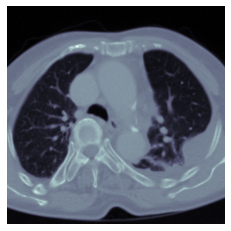

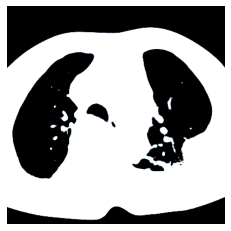

(79, 84, 10, 24)


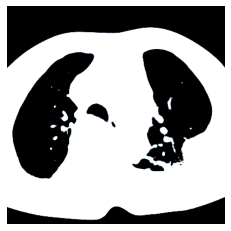

79 84 10 24


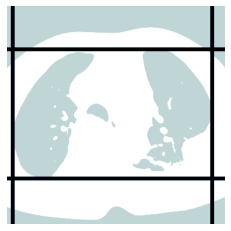

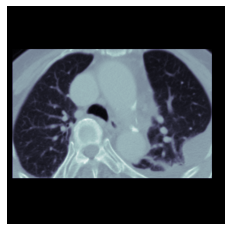

In [10]:
image =  pydicom.dcmread(path).pixel_array.astype(np.int16)
image = crop_center(image, 400, 400)
plt.imshow(image ,plt.cm.bone)
plt.axis('off')
plt.show()
img = image.copy()
print(edgecut(image))
top_line,bottom_line, left_line,right_line = edgecut(image)
print(top_line,bottom_line, left_line,right_line)

cv2.line(image, (400-right_line, 0), (400-right_line, 400), (255, 0, 0), 5)
cv2.line(image, (left_line, 0), (left_line, 400), (255, 0, 0), 5)
cv2.line(image, (0, top_line), (400, top_line), (255, 0, 0), 5)
cv2.line(image, (0, 400-bottom_line), (400, 400-bottom_line), (255, 0, 0), 5)
plt.imshow(image ,plt.cm.bone)
plt.axis('off')
plt.show()

img = img[top_line:400-bottom_line, left_line:400-right_line]
img_bonecut = cv2.copyMakeBorder(img,top_line,bottom_line, left_line,right_line,cv2.BORDER_CONSTANT,value=0)
plt.imshow(img_bonecut ,plt.cm.bone)
plt.axis('off')
plt.show()

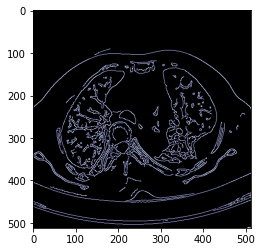

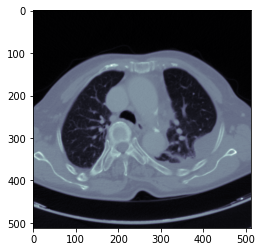

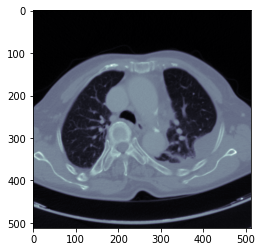

In [42]:
img_1 = image.copy()
blurred = cv2.GaussianBlur(img_1, (1,1) , 0)
blurred = ((blurred / np.max(blurred))*255).astype(np.uint8)
canny = cv2.Canny(blurred, 30 , 70)

#canny = canny*0.5 + img*0.5
img_canny = cv2.copyMakeBorder(canny,top_line,bottom_line, left_line,right_line,cv2.BORDER_CONSTANT,value=0)

plt.imshow(canny, plt.cm.bone)
plt.show()
img =  pydicom.dcmread(path).pixel_array.astype(np.int16)
plt.imshow(img, plt.cm.bone)
plt.show()
plt.imshow(blurred, plt.cm.bone)
plt.show()

In [ ]:
img = image[top_line:450-bottom_line, left_line:512-right_line]
#ud = (top_line + bottom_line - 112)/2
#rl = (right_line + left_line - 112)/2
img = cv2.copyMakeBorder(img,top_line,bottom_line, left_line,right_line,cv2.BORDER_CONSTANT,value=0)
plt.imshow(img ,plt.cm.bone)
plt.show()

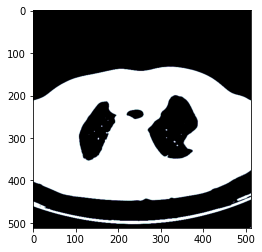

In [253]:
image_b =  pydicom.dcmread(path).pixel_array.astype(np.int16)

image_b [image_b >800] = 800
image_b [image_b <700] = 700
image_b  = image_b -700
image_b  = (image_b /50)-1
plt.imshow(image_b ,plt.cm.bone)
plt.show()

In [254]:
i = 0
j = 0
left_edge = []
top_edge = []
right_edge = []
bottom_edge = []

for j in range(450):
    #print('y = ',j)
    flag = 0
    for i in range(512):
        
        if image_b[j,i]>0.9:
            flag = 1
            #print(j)
            
        if (image_b[j, i] < -0.9) and (flag == 1) :
            #print(i,j)
            left_edge.append(i)
            #y.append(1)
            break

for j in range(450):
    #print('y = ',j)
    flag = 0
    for i in range(512):
        
        if image_b[j,511-i]>0.9:
            flag = 1
            #print(j)
            
        if (image_b[j, 511-i] < -0.9) and (flag == 1) :
            #print(i,j)
            right_edge.append(i)
            #y.append(1)
            break
            
for j in range(512):
    #print('y = ',j)
    flag = 0
    for i in range(512):
        
        if image_b[i,j]>0.9:
            flag = 1
            #print(j)
            
        if (image_b[i, j] < -0.9) and (flag == 1) :
            #print(i,j)
            top_edge.append(i)
            #y.append(1)
            break
            
for j in range(512):
    #print('y = ',j)
    flag = 0
    for i in range(512):
        
        if image_b[i,j]>0.9:
            flag = 1
            #print(j)
            
        if (image_b[i, j] < -0.9) and (flag == 1) :
            #print(i,j)
            top_edge.append(i)
            #y.append(1)
            break
j = 100
for j  in range(400):
    #print('y = ',j)
    flag = 0
    for i in range(451):
        
        if image_b[450-i,j]>0.9:
            flag =  1
            #print(j)
            
        if (image_b[450-i, j] < -0.9) and (flag == 1) :
            #print(i,j)
            bottom_edge.append(i)
            #y.append(1)
            break
#left_edge

201 100 108 50


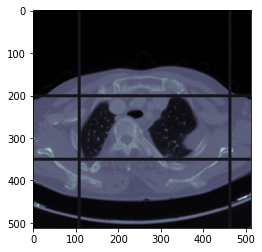

In [255]:
right_line = np.min(right_edge)         
left_line = np.min(left_edge)
top_line = np.min(top_edge)
bottom_line = np.min(bottom_edge)
if bottom_line < 100:
    bottom_line = 100
if right_line < 50:
    right_line = 50
print(top_line,bottom_line, left_line,right_line)
image =  pydicom.dcmread(path).pixel_array.astype(np.int16)
cv2.line(image, (512-right_line, 0), (512-right_line, 512), (255, 0, 0), 5)
cv2.line(image, (left_line, 0), (left_line, 512), (255, 0, 0), 5)
cv2.line(image, (0, top_line), (512, top_line), (255, 0, 0), 5)
cv2.line(image, (0, 450-bottom_line), (512, 450-bottom_line), (255, 0, 0), 5)
plt.imshow(image ,plt.cm.bone)
plt.show()

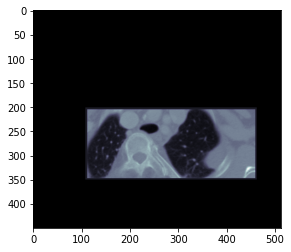

In [256]:
img = image[top_line:450-bottom_line, left_line:512-right_line]
#ud = (top_line + bottom_line - 112)/2
#rl = (right_line + left_line - 112)/2
img = cv2.copyMakeBorder(img,top_line,bottom_line, left_line,right_line,cv2.BORDER_CONSTANT,value=0)
plt.imshow(img ,plt.cm.bone)
plt.show()

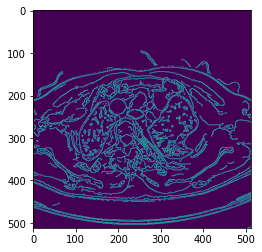

In [257]:
image_canny = pydicom.dcmread(path).pixel_array.astype(np.int16)
image_canny[image_canny>1624] = 1624
image_canny = (image_canny/812)-1
blurred = cv2.GaussianBlur(image_canny, (3,3) , 0)
blurred = ((blurred / np.max(blurred))*255).astype(np.uint8)
canny = cv2.Canny(blurred, 30 , 90)

plt.imshow(blurred)
plt.imshow(canny)
plt.show()

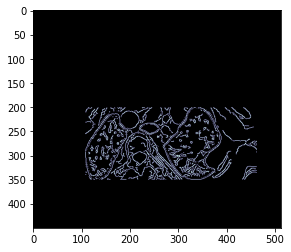

In [258]:
img_c = canny[top_line:450-bottom_line, left_line:512-right_line]
img_c = cv2.copyMakeBorder(img_c,top_line,bottom_line, left_line,right_line,cv2.BORDER_CONSTANT,value=0)
plt.imshow(img_c ,plt.cm.bone)
plt.show()

In [106]:
image_b.shape

(512, 512)

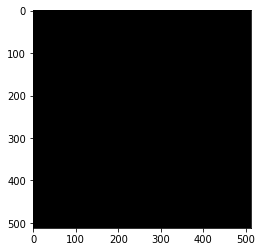

In [25]:
#image[image>1624] = 1624
image = (image/2047.5)-1
image = (2*image/4095)-1
image = (image/812)-1
plt.imshow(image,plt.cm.bone)
plt.show()

In [23]:
up_lim = 600
dn_lim = 150
lim_dif = up_lim - dn_lim
A_img = image
A_img[A_img>up_lim] = up_lim
A_img[A_img<dn_lim] = dn_lim
A_img = (A_img/lim_dif)-1

<function matplotlib.pyplot.show(close=None, block=None)>

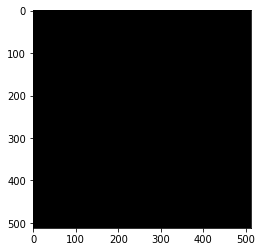

In [24]:
plt.imshow(A_img,plt.cm.bone)
plt.show

Matplotlib created a temporary config/cache directory at /tmp/matplotlib-u_m6revi because the default path (/home/ubuntu/.config/matplotlib) is not a writable directory; it is highly recommended to set the MPLCONFIGDIR environment variable to a writable directory, in particular to speed up the import of Matplotlib and to better support multiprocessing.
In /home/ubuntu/tensorflow/anaconda3/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The text.latex.preview rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In /home/ubuntu/tensorflow/anaconda3/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The mathtext.fallback_to_cm rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In /home/ubuntu/tensorflow/anaconda3/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: Support for setting the 'mathtext.fallback_to_cm' rcParam is dep

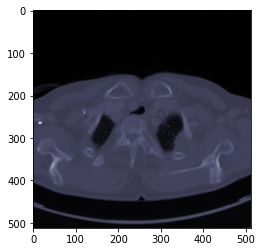

In [11]:
import matplotlib.pyplot as plt
plt.imshow(image,plt.cm.bone)
plt.show()

In [12]:
path = "/home/ubuntu/Andrew/pytorch-CycleGAN-and-pix2pix-master/CTPA_dicom_dataset/testA/0.dcm"
image = pydicom.dcmread(path).pixel_array

In [13]:
print(image.max(), image.min())

2164 0


In [6]:
path = "/home/ubuntu/Andrew/pytorch-CycleGAN-and-pix2pix-master/CTPA_dicom_dataset/trainA/0031759216.dcm"
image = pydicom.dcmread(path).pixel_array
up_lim = 600
dn_lim = 150
lim_dif = up_lim - dn_lim
A_img = image
A_img[A_img>up_lim] = up_lim
A_img[A_img<dn_lim] = dn_lim
#A_img = (A_img/lim_dif)-1

In [32]:
def crop_center(img,cropx,cropy):
    x,y = img.shape
    startx = x//2 - cropx//2
    starty = y//2 - cropy//2    
    return img[startx:startx+cropx, starty:starty+cropy]

In [33]:
img = crop_center(image, 180, 300)
img = cv2.copyMakeBorder(img,110,110,50,50,cv2.BORDER_CONSTANT,value=0)

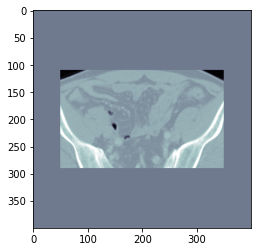

In [34]:
import matplotlib.pyplot as plt
plt.imshow(img,plt.cm.bone)
plt.show()

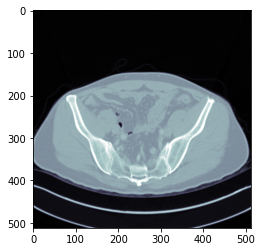

In [35]:
plt.imshow(image,plt.cm.bone)
plt.show()

In [29]:
testing_0 = list(glob.glob('/home/ubuntu/Andrew/lung_datatset/test/WNL/*'))
count = 1
for n in testing_0:
    if count == 78:
        print(n)
    count = count+1

/home/ubuntu/Andrew/lung_datatset/test/WNL/1974637222.dcm


2004 0


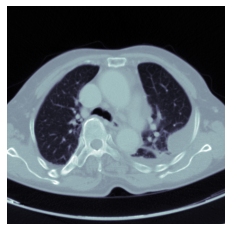

In [32]:
test_path =  "/home/ubuntu/Andrew/lung_datatset/test/WNL/1974637225.dcm"
img =  pydicom.dcmread(path).pixel_array.astype(np.int16)
print(img.max(), img.min())
img[img>1624] = 1624
plt.imshow(img ,plt.cm.bone)
plt.axis('off')
plt.show()